## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente.
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

Notes Chat curso:

Función para obtener las columnas que contienen "+"

def columnas_con_mas(df_fifa):
    columns_with_plus=[col for col in df_fifa.columns if df_fifa[col].astype(str).str.contains(r'\+').any()]
    return columns_with_plus

Beltran Vazquez 14:27
fifa['W/F'] = fifa['W/F'].str.replace(' ★','')


GK
Portero
RB
Defensa
CB
Defensa
LB
Defensa
CM
Mediocampista
CAM
Mediocampista
CDM
Mediocampista
LM
Mediocampista
RM
Mediocampista
LWB
Mediocampista
RWB
Mediocampista
ST
Delantero
RW
Delantero
LW
Delantero
CF
Delantero
r'\D'

In [65]:
import pandas as pd

In [66]:
#import the csv stored locally on Google Colab

from google.colab import files
uploaded = files.upload()

Saving fifa.csv to fifa (2).csv


In [67]:
#define df_fifa and show the first lines

df_fifa = pd.read_csv("fifa.csv")
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?


In [68]:
# Hay 102 columnas y 13700 filas
filas, columnas = df_fifa.shape
print(f"\nEl dataset tiene {filas} filas y {columnas} columnas.")


El dataset tiene 13700 filas y 102 columnas.


In [69]:
# Las variables son de type: float64(10), int64(44), object(48)


"""
# Obtener tipos de datos
print("Tipos de datos de cada columna:")
print(df_fifa.dtypes)

# Obtener el número de filas y columnas
filas, columnas = df_fifa.shape
print(f"\nEl dataset tiene {filas} filas y {columnas} columnas.")

# or

"""
df_fifa.info(105)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 102 columns):
 #    Column            Dtype  
---   ------            -----  
 0    Unnamed: 0        int64  
 1    ID                int64  
 2    Name              object 
 3    Age               int64  
 4    Nationality       object 
 5    Club              object 
 6    BP                object 
 7    Position          object 
 8    Team & Contract   object 
 9    Height            object 
 10   Weight            object 
 11   foot              object 
 12   Growth            int64  
 13   Joined            object 
 14   Loan Date End     object 
 15   Value             object 
 16   Wage              object 
 17   Release Clause    object 
 18   Contract          object 
 19   Attacking         int64  
 20   Crossing          int64  
 21   Finishing         int64  
 22   Heading Accuracy  int64  
 23   Short Passing     int64  
 24   Volleys           float64
 25   Skill             in

In [70]:
df_fifa.describe()

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,...,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8561.641971,219378.929708,25.286058,5.509927,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,...,15.830292,1630.103942,361.317007,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912
std,4954.144383,37445.343736,4.944498,5.797176,72.412379,17.899930,19.411530,17.010578,13.975634,17.760924,...,17.276491,260.986045,40.258414,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189
min,1.000000,16.000000,16.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,...,1.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,4269.750000,203979.750000,21.000000,0.000000,231.000000,41.000000,33.000000,45.000000,56.000000,32.000000,...,8.000000,1491.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,8555.500000,228927.000000,25.000000,4.000000,271.000000,56.000000,52.000000,56.000000,63.000000,47.000000,...,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,12887.250000,244043.500000,29.000000,9.000000,306.000000,65.000000,64.000000,65.000000,69.000000,59.000000,...,14.000000,1811.250000,389.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
max,17122.000000,259091.000000,47.000000,26.000000,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,...,90.000000,2304.000000,498.000000,96.000000,93.000000,93.000000,95.000000,90.000000,93.000000,93.000000


Cambia las medidas de las variables Weight y Height a Kg y cm

In [71]:
# Función para convertir altura a cm
def height_to_cm(height):
    try:
        feet, inches = height.split("'")  # divide la cadena en dos partes donde esta el " ' ": parte feet y parte inches
        feet = int(feet.strip())  # Convertir pies a numeros (integer) con "int" y elimina espacios con strip()
        inches = int(inches.replace('"', '').strip())  # Convertir pulgadas a numeros (integer) con "int" y reemplazar la comilla por nada (=quitar la comilla)
        total_inches = feet * 12 + inches  # Se multiplica feet por 12 (porque 1 foot = 12 inches) y se suma los inches restantes
        return total_inches * 2.54  # Se multiplica el total de pulgadas por 2.54 porque 1 inch = 2.54 cm
    except:
        return None  # En caso de error

# Aplicar la conversión a la columna
df_fifa["Height_cm"] = df_fifa["Height"].apply(height_to_cm)

# Mostrar resultado
print(df_fifa.Height_cm)

# Reemplazar height par height_cm
df_fifa["Height"] = df_fifa["Height_cm"]

0        175.26
1        182.88
2        162.56
3        177.80
4        180.34
          ...  
13695    172.72
13696    195.58
13697    170.18
13698    180.34
13699    177.80
Name: Height_cm, Length: 13700, dtype: float64


In [72]:
df_fifa.Height

,Height
0,175.26
1,182.88
2,162.56
3,177.80
4,180.34
...,...
13695,172.72
13696,195.58
13697,170.18
13698,180.34


In [73]:
# Función para convertir Weight a kg
def weight_to_kg(Weight):
    try:
        return float(Weight.replace('lbs', '').strip()) * 0.453592
    except:
        return None  # Manejo de errores en caso de valores inválidos

# Aplicar la conversión a la columna
df_fifa["Weight_kg"] = df_fifa["Weight"].apply(weight_to_kg)

# Mostrar resultado
print(df_fifa["Weight_kg"])






0        73.028312
1        72.121128
2        60.781328
3        68.945984
4        68.038800
           ...    
13695    64.863656
13696    79.832192
13697    66.224432
13698    79.832192
13699    68.038800
Name: Weight_kg, Length: 13700, dtype: float64


In [74]:
# Redondear a 2 decimales
df_fifa["Weight_kg"] = df_fifa["Weight_kg"].round(2)

#  Reemplazar height por height_cm
df_fifa["Weight"] = df_fifa["Weight_kg"]

df_fifa.Weight

,Weight
0,73.03
1,72.12
2,60.78
3,68.95
4,68.04
...,...
13695,64.86
13696,79.83
13697,66.22
13698,79.83


Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
Arregla también las variables W/F, SM, IR


In [75]:
# Aplicar split para eliminar "+número"
df_fifa.iloc[:, 92:101] = df_fifa.iloc[:, 92:101].astype(str).apply(lambda col: col.str.split("+").str[0])

'''
.astype(str) → Asegura que todos los valores sean cadenas de texto antes de aplicar split.
.apply(lambda col: col.str.split("+").str[0]) → Aplica la función split a cada columna.
Usa .split("+") para separar el valor en dos partes (antes y después del +).
str[0] toma la primera parte (el número sin +X).
'''

print("\nDespués de limpiar:")
print(df_fifa)

'''
Otra opcion con Regex:
# 1. Eliminar el "+1", "+2", etc., de todas las columnas tipo "object"
df_fifa.iloc[:, 92:101] = df_fifa.iloc[:, 92:101].replace(r"\+\d+", "", regex=True)

# 2. Seleccionar solo las columnas necesarias (descartar las últimas)
df_fifa = df_fifa.iloc[:, :102]  # Mantiene solo las primeras 102 columnas

# Verificar los cambios
print(df_fifa.head())
'''


Después de limpiar:
       Unnamed: 0      ID           Name  Age  Nationality  \
0            1954  184383      A. Pasche   26  Switzerland   
1            2225  188044  Alan Carvalho   30     China PR   
2            1959  184431    S. Giovinco   33        Italy   
3            9815  233796       J. Evans   22        Wales   
4           10074  234799     Y. Demoncy   23       France   
...           ...     ...            ...  ...          ...   
13695       11284  239074          S. Aw   21      Senegal   
13696       11964  241223        S. Mogi   21        Japan   
13697        5390  210930     Carles Gil   27        Spain   
13698         860  162993       J. Perch   34      England   
13699       15795  254882  A. Oeynhausen   18      Germany   

                             Club   BP   Position  \
0               FC Lausanne-Sport   CM     CM CDM   
1         Beijing Sinobo Guoan FC   ST   ST LW LM   
2                        Al Hilal  CAM     CAM CF   
3                    S

'\nOtra opcion con Regex:\n# 1. Eliminar el "+1", "+2", etc., de todas las columnas tipo "object"\ndf_fifa.iloc[:, 92:101] = df_fifa.iloc[:, 92:101].replace(r"\\+\\d+", "", regex=True)\n\n# 2. Seleccionar solo las columnas necesarias (descartar las últimas)\ndf_fifa = df_fifa.iloc[:, :102]  # Mantiene solo las primeras 102 columnas\n\n# Verificar los cambios\nprint(df_fifa.head())\n'

In [76]:
display(df_fifa[[ 'W/F', 'SM', 'IR']])

,W/F,SM,IR
0,4 ★,2★,1 ★
1,3 ★,4★,2 ★
2,4 ★,4★,2 ★
3,2 ★,2★,1 ★
4,2 ★,3★,1 ★
...,...,...,...
13695,3 ★,2★,1 ★
13696,2 ★,1★,1 ★
13697,4 ★,4★,2 ★
13698,3 ★,2★,1 ★


In [77]:
# Lista de columnas a buscar
columns_to_find = ["W/F", "SM", "IR"]

# Obtener los índices de las columnas
indices = [df_fifa.columns.get_loc(col) for col in columns_to_find]

# Mostrar los índices encontrados
print("Índices de las columnas:", indices)

Índices de las columnas: [62, 63, 66]


In [78]:
# Índices de las columnas a limpiar
columns_to_clean = [62, 63, 66]

# Aplicar reemplazo para quitar '★' en las columnas seleccionadas
df_fifa.iloc[:, columns_to_clean] = df_fifa.iloc[:, columns_to_clean].apply(lambda col: col.str.replace("★", "", regex=False))

# Verificar los cambios
display(df_fifa.iloc[:, columns_to_clean].head())

# Aplicar reemplazo en todas las columnas seleccionadas
#df_fifa[columns_to_clean] = df_fifa[columns_to_clean].apply(lambda col: col.str.replace("★", "", regex=False))

# Verificar los cambios
#display(df_fifa.head())

,W/F,SM,IR
0,4,2,1
1,3,4,2
2,4,4,2
3,2,2,1
4,2,3,1


# Explicación paso a paso
# df_fifa.iloc[:, columns_to_clean]

df_fifa es nuestro DataFrame donde estamos trabajando.

.iloc[]: Usamos este método para acceder a los datos del DataFrame por índices (tanto de filas como de columnas).

El primer valor antes de la coma (antes del :) se refiere a las filas. Como dejamos el valor vacío, significa que estamos seleccionando todas las filas.

El segundo valor después de la coma (después del :) se refiere a las columnas.

En este caso, estamos usando la lista columns_to_clean, que contiene los índices [62, 63, 66]. Esto significa que estamos seleccionando solo las columnas en las posiciones 62, 63 y 66.

Entonces, df_fifa.iloc[:, columns_to_clean] selecciona todas las filas, pero únicamente las columnas que se encuentran en los índices 62, 63 y 66.

# apply(lambda col: col.str.replace("★", "", regex=False))

.apply(): Este método lo aplicamos a las columnas que hemos seleccionado. Con él, estamos transformando cada columna individualmente.

lambda col: ...: Usamos lambda para crear una función anónima, que aplicamos a cada columna. En cada iteración, col es una de las columnas que estamos procesando.

# .str.replace("★", "", regex=False):

.str nos permite usar funciones de cadena (strings) en cada valor de la columna.

.replace("★", "", regex=False) busca el símbolo ★ en cada valor de la columna y lo reemplaza por una cadena vacía (""), es decir, lo elimina.

regex=False significa que no estamos usando expresiones regulares, sino que hacemos un reemplazo directo del carácter ★.

# 📌 Resumen

El código df_fifa.iloc[:, columns_to_clean] = df_fifa.iloc[:, columns_to_clean].apply(lambda col: col.str.replace("★", "", regex=False)) hace lo siguiente:



1.   Seleccionamos las columnas en los índices [62, 63, 66] de todas las filas del DataFrame.
2.   Aplicamos una función a cada columna seleccionada que elimina todas las estrellas (★) de los valores de las celdas.
3.   Finalmente, guardamos el resultado de vuelta en esas mismas columnas del DataFrame.







Solucion:
Beltran Vazquez 14:27
fifa['W/F'] = fifa['W/F'].str.replace(' ★','')

# Agrupar por valores unicos

Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.



*  GK Portero
*  RB Defensa
*  CB Defensa
*  LB Defensa
*  CM Mediocampista
*  CAM Mediocampista
*  CDM Mediocampista
*  DM Mediocampista
*  LM Mediocampista
*  RM Mediocampista
*  LWB Mediocampista
*  RWB Mediocampista
*  ST Delantero
*  RW Delantero
*  LW Delantero
*  CF Delantero

In [79]:
# Obtener los valores únicos de la columna 'BP'
valores_unicos = df_fifa['BP'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['CM' 'ST' 'CAM' 'CDM' 'LM' 'RB' 'CB' 'RM' 'GK' 'LB' 'RW' 'LWB' 'LW' 'RWB'
 'CF']


In [80]:
display(df_fifa['BP'].head())

,BP
0,CM
1,ST
2,CAM
3,CDM
4,CDM


In [81]:
def posiciones_jugadores(BP):
    # Asignar las posiciones en función de la BP
    if BP == 'GK':
        return 'Portero'
    elif BP in ['RB', 'CB', 'LB']:
        return 'Defensa'
    elif BP in ['CM', 'CAM','CDM', 'DM', 'LM', 'RM', 'LWB', 'RWB']:
        return 'Mediocampista'
    elif BP in ['ST', 'RW', 'LW', 'CF']:
        return 'Delantero'
    else:
        return 'Otra'  # En caso de que no coincida con ninguna de las posiciones especificadas

# Aplicar la función a la columna 'BP' y crear una nueva columna 'Posicion'
df_fifa['Posicion'] = df_fifa['BP'].apply(posiciones_jugadores)

# Verificar el resultado
print(df_fifa[['BP', 'Posicion']].head())


    BP       Posicion
0   CM  Mediocampista
1   ST      Delantero
2  CAM  Mediocampista
3  CDM  Mediocampista
4  CDM  Mediocampista


In [82]:
display(df_fifa[['Value', 'Wage']].head())

,Value,Wage
0,€525K,€4K
1,€8.5M,€23K
2,€9M,€49K
3,€275K,€4K
4,€725K,€2K


In [83]:
# Function to convert the value and wage to integers
def convert_to_int(value):
    try:
        # Check if the value is None
        if value is None:
            return None

        # If the value is already an integer, just return it
        if isinstance(value, int):
            return value

        # If the value is a string, clean it and convert it to an integer
        value = value.strip()  # Remove any leading/trailing spaces

        if 'M' in value:  # If the value is in millions
            return int(float(value.replace('€', '').replace('M', '').strip()) * 1_000_000)
        elif 'K' in value:  # If the value is in thousands
            return int(float(value.replace('€', '').replace('K', '').strip()) * 1_000)
        else:  # If it's just a numeric value
            return int(value.replace('€', '').strip())  # Remove the € symbol and convert to integer

    except Exception as e:
        print(f"Error with value: {value} -> {e}")
        return None  # Return None if there's an error

# Apply the conversion to the 'Value' and 'Wage' columns
df_fifa['Value'] = df_fifa['Value'].apply(convert_to_int)
df_fifa['Wage'] = df_fifa['Wage'].apply(convert_to_int)

# Verify the results
print(df_fifa[['Value', 'Wage']].head())






     Value   Wage
0   525000   4000
1  8500000  23000
2  9000000  49000
3   275000   4000
4   725000   2000


'\nExplicación del código:\nconvert_to_int(value):\n\nLa función toma como entrada un valor (por ejemplo, de la columna Value o Wage).\nSi el valor contiene el símbolo "M" (millones), lo multiplica por 1,000,000.\nSi el valor contiene el símbolo "K" (miles), lo multiplica por 1,000.\nSi el valor no tiene "M" ni "K", simplemente limpia el símbolo "€" y lo convierte a un número entero.\n.strip() elimina cualquier espacio en blanco adicional antes o después del valor.\nfloat() y luego int() se usan para asegurar que el valor se convierte correctamente.\n.apply(convert_to_int): Aplica esta función a cada valor de las columnas Value y Wage para realizar la conversión.\n\ndf_fifa[[\'Value\', \'Wage\']].head(): Muestra los primeros valores de las columnas Value y Wage para que puedas verificar el resultado.\n'

# Explicación del código:
convert_to_int(value):

La función toma como entrada un valor (por ejemplo, de la columna Value o Wage).

Si el valor contiene el símbolo "M" (millones), lo multiplica por 1,000,000.

Si el valor contiene el símbolo "K" (miles), lo multiplica por 1,000.

Si el valor no tiene "M" ni "K", simplemente limpia el símbolo "€" y lo convierte a un número entero.

.strip() elimina cualquier espacio en blanco adicional antes o después del valor.

float() y luego int() se usan para asegurar que el valor se convierte correctamente.

.apply(convert_to_int): Aplica esta función a cada valor de las columnas Value y Wage para realizar la conversión.

df_fifa[['Value', 'Wage']].head(): Muestra los primeros valores de las columnas Value y Wage para que puedas verificar el resultado.


In [90]:
# 1. Calcular la suma y media por equipo
# Agrupamos por la columna 'Team' (asegúrate de usar el nombre correcto en tu DataFrame)
group_by_team = df_fifa.groupby('Club')[['Value', 'Wage']].agg(['sum', 'mean']).round(2)

# 2. Calcular la suma y media por posición
# Agrupamos por la columna 'Best Position' (asegúrate de usar el nombre correcto en tu DataFrame)
group_by_position = df_fifa.groupby('Posicion')[['Value', 'Wage']].agg(['sum', 'mean']).round(2)

# 3. Calcular la suma y media por nacionalidad
# Agrupamos por la columna 'Nationality' (asegúrate de usar el nombre correcto en tu DataFrame)
group_by_nationality = df_fifa.groupby('Nationality')[['Value', 'Wage']].agg(['sum', 'mean']).round(2)

# Mostrar los resultados
print("Suma y media por equipo:")
print(group_by_team.head())

print("\nSuma y media por posición:")
print(group_by_position.head())

print("\nSuma y media por nacionalidad:")
print(group_by_nationality.head())


Suma y media por equipo:
                          Value                Wage          
                            sum        mean     sum      mean
Club                                                         
1. FC Heidenheim 1846  24295000  1278684.21  154500   8131.58
1. FC Kaiserslautern   15530000   647083.33   44300   1845.83
1. FC Köln             77255000  3862750.00  325000  16250.00
1. FC Magdeburg         6910000   383888.89   20050   1113.89
1. FC Nürnberg         38565000  1752954.55  134000   6090.91

Suma y media por posición:
                     Value                  Wage          
                       sum        mean       sum      mean
Posicion                                                  
Defensa         8938979990  2229172.07  41314100  10302.77
Delantero       6950689985  2617962.33  29996050  11297.95
Mediocampista  16059297988  2790979.84  60750500  10557.96
Portero         2980445998  2326655.74  10997950   8585.44

Suma y media por nacionalidad:
      

In [101]:
# 1. Obtener el club con el máximo valor medio de 'Wage'
mean_wage_by_club = df_fifa.groupby('Club')['Wage'].mean().round(2)
max_mean_wage_club = mean_wage_by_club.idxmax()
max_mean_wage_value = mean_wage_by_club.max()

print(f"El club con el valor máximo de la media de 'Wage' es: {max_mean_wage_club} con un valor de {max_mean_wage_value}")
print(mean_wage_by_club.head())

# 2. Obtener el club con el máximo valor de la suma de 'Wage'
sum_wage_by_club = df_fifa.groupby('Club')['Wage'].sum().round(2)
max_sum_wage_club = sum_wage_by_club.idxmax()
max_sum_wage_value = sum_wage_by_club.max()

print(f"\nEl club con el valor máximo de la suma de 'Wage' es: {max_sum_wage_club} con un valor de {max_sum_wage_value}")

# 3. Obtener el club con el máximo valor medio de 'Value'
mean_value_by_club = df_fifa.groupby('Club')['Value'].mean().round(2)
max_mean_value_club = mean_value_by_club.idxmax()
max_mean_value = mean_value_by_club.max()

print(f"\nEl club con el valor máximo de la media de 'Value' es: {max_mean_value_club} con un valor de {max_mean_value}")

# 4. Obtener el club con el máximo valor de la suma de 'Value'
sum_value_by_club = df_fifa.groupby('Club')['Value'].sum().round(2)
max_sum_value_club = sum_value_by_club.idxmax()
max_sum_value = sum_value_by_club.max()

print(f"\nEl club con el valor máximo de la suma de 'Value' es: {max_sum_value_club} con un valor de {max_sum_value}")




El club con el valor máximo de la media de 'Wage' es: Real Madrid con un valor de 164708.33
Club
1. FC Heidenheim 1846     8131.58
1. FC Kaiserslautern      1845.83
1. FC Köln               16250.00
1. FC Magdeburg           1113.89
1. FC Nürnberg            6090.91
Name: Wage, dtype: float64

El club con el valor máximo de la suma de 'Wage' es: Real Madrid con un valor de 3953000

El club con el valor máximo de la media de 'Value' es: Real Madrid con un valor de 26808333.33

El club con el valor máximo de la suma de 'Value' es: Manchester City con un valor de 650920000


# Tratamiento de valores nulos:

Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas

Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...


In [104]:
# Contar los valores nulos por columna - 13700 filas en total
null_counts = df_fifa.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos
print("Número de valores nulos por columna:")
print(null_counts[null_counts > 0])

Número de valores nulos por columna:
Club                 21
Position            343
Joined               44
Loan Date End     12961
Volleys              44
Curve                44
Agility              44
Balance              44
Jumping              44
Interceptions         7
Positioning           7
Vision               44
Composure           329
Sliding Tackle       44
A/W                  67
D/W                  67
dtype: int64


In [107]:
#quitar Loan Date End (94.6% NULL)
# Eliminar la columna 'Loan Date End'
df_fifa = df_fifa.drop('Loan Date End', axis=1)

# Verificar que la columna ha sido eliminada
display(df_fifa.head())


,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,LB,LCB,CB,RCB,RB,GK,OVA,Height_cm,Weight_kg,Posicion
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.26,...,58,54,54,54,58,15,64,175.26,73.03,Mediocampista
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.88,...,53,48,48,48,53,18,77,182.88,72.12,Delantero
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.56,...,53,41,41,41,53,12,80,162.56,60.78,Mediocampista
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.80,...,57,58,58,58,57,14,59,177.80,68.95,Mediocampista
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.34,...,63,61,61,61,63,15,65,180.34,68.04,Mediocampista


In [108]:
# Contar los valores nulos por columna - 13700 filas en total
null_counts = df_fifa.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos
print("Número de valores nulos por columna:")
print(null_counts[null_counts > 0])

Número de valores nulos por columna:
Club               21
Position          343
Joined             44
Volleys            44
Curve              44
Agility            44
Balance            44
Jumping            44
Interceptions       7
Positioning         7
Vision             44
Composure         329
Sliding Tackle     44
A/W                67
D/W                67
dtype: int64


In [112]:
# Eliminar filas con valores nulos
df_fifa_cleaned = df_fifa.dropna()

# Mostrar las primeras filas del DataFrame limpio
display(df_fifa_cleaned.head())


,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,LB,LCB,CB,RCB,RB,GK,OVA,Height_cm,Weight_kg,Posicion
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.26,...,58,54,54,54,58,15,64,175.26,73.03,Mediocampista
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.88,...,53,48,48,48,53,18,77,182.88,72.12,Delantero
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.56,...,53,41,41,41,53,12,80,162.56,60.78,Mediocampista
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.80,...,57,58,58,58,57,14,59,177.80,68.95,Mediocampista
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.34,...,63,61,61,61,63,15,65,180.34,68.04,Mediocampista


In [114]:
# Contar los valores nulos por columna - 13700 filas en total
null_counts = df_fifa_cleaned.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos
print("Número de valores nulos por columna:")
print(null_counts[null_counts > 0])

Número de valores nulos por columna:
Series([], dtype: int64)


In [115]:
# Ver estadísticas descriptivas de las columnas numéricas
print(df_fifa_cleaned.describe())

         Unnamed: 0             ID           Age        Height        Weight  \
count  13124.000000   13124.000000  13124.000000  13124.000000  13124.000000   
mean    8870.919537  223211.997790     25.013411    181.218665     75.056495   
std     4804.840564   30100.050674      4.749149      6.897201      7.144053   
min        1.000000      16.000000     16.000000    154.940000     53.070000   
25%     4732.750000  206433.750000     21.000000    175.260000     69.850000   
50%     8907.500000  230250.500000     24.000000    180.340000     74.840000   
75%    13056.250000  244471.250000     28.000000    185.420000     79.830000   
max    17122.000000  259091.000000     47.000000    205.740000    110.220000   

             Growth         Value           Wage     Attacking      Crossing  \
count  13124.000000  1.312400e+04   13124.000000  13124.000000  13124.000000   
mean       5.670756  2.622750e+06   10351.070558    257.947196     51.486361   
std        5.815696  5.387566e+06   211

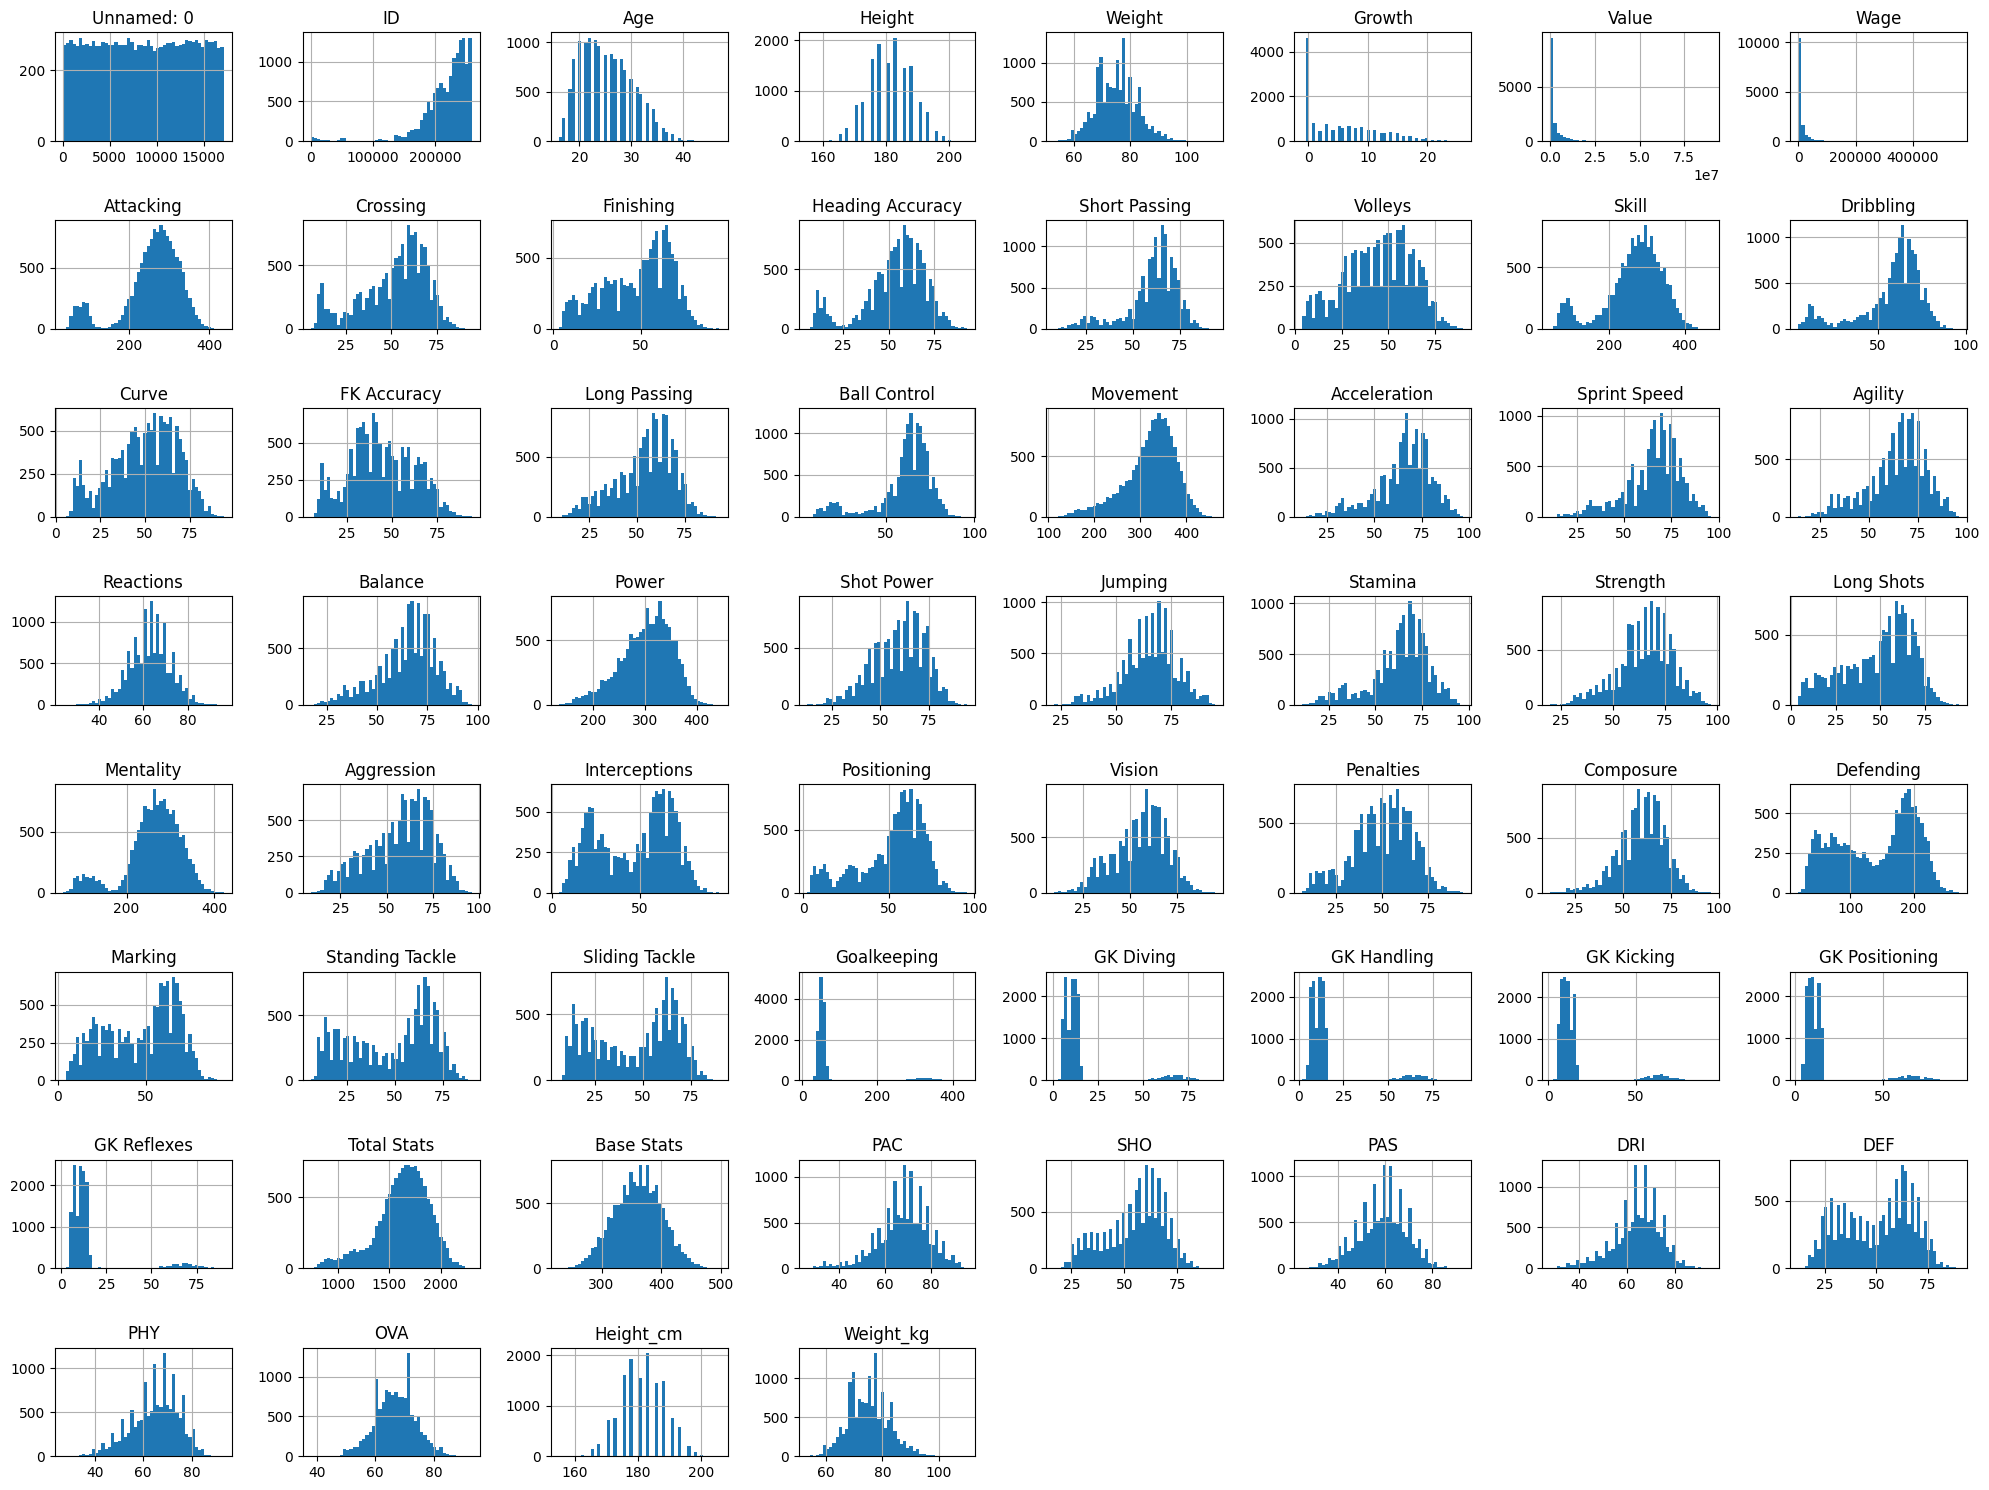

In [116]:
import matplotlib.pyplot as plt

# Graficar histogramas de las variables numéricas
df_fifa.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()


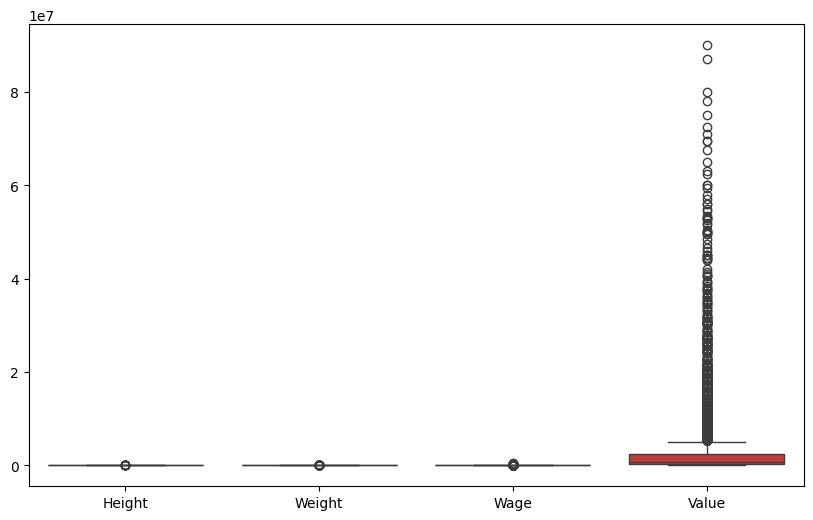

In [117]:
import seaborn as sns

# Graficar boxplots de algunas columnas numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fifa[['Height', 'Weight', 'Wage', 'Value']])
plt.show()


In [84]:
df_fifa.columns[3:]

Index(['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Growth',
       ...
       'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA', 'Height_cm', 'Weight_kg',
       'Posicion'],
      dtype='object', length=102)

In [85]:
df_fifa[['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']]

,W/F,SM,A/W,D/W,IR,Value,Wage
0,4,2,High,Medium,1,525000,4000
1,3,4,High,Low,2,8500000,23000
2,4,4,High,Medium,2,9000000,49000
3,2,2,Medium,Medium,1,275000,4000
4,2,3,Low,Medium,1,725000,2000
...,...,...,...,...,...,...,...
13695,3,2,High,Medium,1,325000,1000
13696,2,1,Medium,Medium,1,190000,700
13697,4,4,High,Medium,2,8000000,9000
13698,3,2,Medium,Medium,1,140000,4000
